In [252]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.colors as pltc
import numpy as np

In [2]:
all_df = pd.read_csv('../data/US_Accidents_Dec20_Updated.csv')

In [3]:
all_df.describe

<bound method NDFrame.describe of                 ID  Severity           Start_Time             End_Time  \
0              A-1         2  2019-05-21 08:29:55  2019-05-21 09:29:40   
1              A-2         2  2019-10-07 17:43:09  2019-10-07 19:42:50   
2              A-3         2  2020-12-13 21:53:00  2020-12-13 22:44:00   
3              A-4         2  2018-04-17 16:51:23  2018-04-17 17:50:46   
4              A-5         3  2016-08-31 17:40:49  2016-08-31 18:10:49   
...            ...       ...                  ...                  ...   
2906605  A-2906606         2  2018-06-28 08:49:01  2018-06-28 09:18:51   
2906606  A-2906607         2  2019-01-10 02:01:01  2019-01-10 02:30:32   
2906607  A-2906608         2  2020-11-23 12:52:00  2020-11-24 00:47:37   
2906608  A-2906609         2  2019-12-29 22:38:00  2019-12-29 23:38:00   
2906609  A-2906610         2  2018-03-26 13:35:03  2018-03-26 14:39:00   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0     

In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
all_df[all_df['State']=='WI'].count()

ID                       14669
Severity                 14669
Start_Time               14669
End_Time                 14669
Start_Lat                14669
Start_Lng                14669
End_Lat                  13589
End_Lng                  13589
Distance(mi)             14669
Description              14669
Number                    2831
Street                   14669
Side                     14669
City                     14668
County                   14669
State                    14669
Zipcode                  14667
Country                  14669
Timezone                 14667
Airport_Code             14667
Weather_Timestamp        14635
Temperature(F)           14609
Wind_Chill(F)             9751
Humidity(%)              14605
Pressure(in)             14626
Visibility(mi)           14606
Wind_Direction           14631
Wind_Speed(mph)          13494
Precipitation(in)         6431
Weather_Condition        14592
Amenity                  14669
Bump                     14669
Crossing

In [13]:
all_df[all_df['State']=='WI']['Weather_Condition']

154                    Fair
556           Partly Cloudy
617        Scattered Clouds
652                    Fair
1008                    Fog
                 ...       
2905597                Haze
2906045                Fair
2906478          Wintry Mix
2906519    Scattered Clouds
2906596       Mostly Cloudy
Name: Weather_Condition, Length: 14669, dtype: object

In [10]:
all_df.groupby('Severity').count()

ID  Start_Time  End_Time  Start_Lat  Start_Lng  End_Lat  \
Severity                                                                 
1           28751       28751     28751      28751      28751    28657   
2         2129263     2129263   2129263    2129263    2129263  1979369   
3          629452      629452    629452     629452     629452   500643   
4          119144      119144    119144     119144     119144   115120   

          End_Lng  Distance(mi)  Description  Number  ...  Roundabout  \
Severity                                              ...               
1           28657         28751        28751   12836  ...       28751   
2         1979369       2129263      2129263  891059  ...     2129263   
3          500643        629452       629452   58428  ...      629452   
4          115120        119144       119144   52615  ...      119144   

          Station     Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
Severity                                                                    
1           28751    28751            28751           28751         28751   
2         2129263  2129263          2129263         2129263       2129263   
3          629452   629452           629452          629452        629452   
4          119144   119144           119144          119144        119144   

          Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  \
Severity                                                      
1                  28748           28748              28748   
2                2129186         2129186            2129186   
3                 629442          629442             629442   
4                 119124          119124             119124   

          Astronomical_Twilight  
Severity                         
1                         28748  
2                       2129186  
3                        629442  
4                        119124  

[4 rows x 46 columns]

In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [21]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

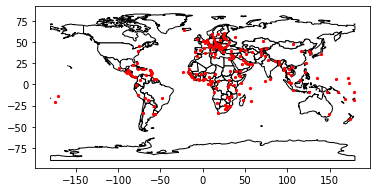

In [29]:
base = world.plot(color='white', edgecolor='black')
cities.plot(ax=base, marker='o', color='red', markersize=5);

In [30]:
test_pd_to_gpd_to_gpd = gpd.GeoDataFrame(all_df, geometry=gpd.points_from_xy(all_df.Start_Lng, all_df.Start_Lat))

In [31]:
test_pd_to_gpd.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         2  2019-05-21 08:29:55  2019-05-21 09:29:40  34.808868   
1  A-2         2  2019-10-07 17:43:09  2019-10-07 19:42:50  35.090080   
2  A-3         2  2020-12-13 21:53:00  2020-12-13 22:44:00  37.145730   
3  A-4         2  2018-04-17 16:51:23  2018-04-17 17:50:46  39.110390   
4  A-5         3  2016-08-31 17:40:49  2016-08-31 18:10:49  26.102942   

    Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0  -82.269157  34.808868  -82.269157           0.0   
1  -80.745560  35.090080  -80.745560           0.0   
2 -121.985052  37.165850 -121.988062           1.4   
3 -119.773781  39.110390 -119.773781           0.0   
4  -80.265091  26.102942  -80.265091           0.0   

                                         Description  ...  Station   Stop  \
0            Accident on Tanner Rd at Pennbrooke Ln.  ...    False  False   
1  Accident on Houston Branch Rd at Providence Br...  ...    False  False   
2  Stationary traffic on CA-17 from Summit Rd (CA...  ...    False  False   
3         Accident on US-395 Southbound at Topsy Ln.  ...    False  False   
4  Accident on I-595 Westbound at Exit 4 / Pine I...  ...    False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False            Day            Day   
1           False          False        False            Day            Day   
2           False          False        False          Night          Night   
3           False           True        False            Day            Day   
4           False           True        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight                     geometry  
0               Day                   Day   POINT (-82.26916 34.80887)  
1               Day                   Day   POINT (-80.74556 35.09008)  
2             Night                 Night  POINT (-121.98505 37.14573)  
3               Day                   Day  POINT (-119.77378 39.11039)  
4               Day                   Day   POINT (-80.26509 26.10294)  

[5 rows x 48 columns]

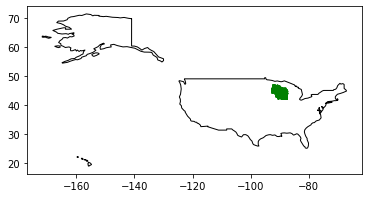

In [38]:
base = world[world.name=='United States of America'].plot(color='white', edgecolor='black')
test_pd_to_gpd[test_pd_to_gpd.State == 'WI'].plot(ax=base, marker='.', color='green', markersize=5);

In [39]:
world[world.name=='United States of America']

pop_est      continent                      name iso_a3  gdp_md_est  \
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [42]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [43]:
world.continent

0            Oceania
1             Africa
2             Africa
3      North America
4      North America
           ...      
172           Europe
173           Europe
174           Europe
175    North America
176           Africa
Name: continent, Length: 177, dtype: object

In [48]:
world.groupby('continent').head()

pop_est                continent                      name iso_a3  \
0       920938                  Oceania                      Fiji    FJI   
1     53950935                   Africa                  Tanzania    TZA   
2       603253                   Africa                 W. Sahara    ESH   
3     35623680            North America                    Canada    CAN   
4    326625791            North America  United States of America    USA   
5     18556698                     Asia                Kazakhstan    KAZ   
6     29748859                     Asia                Uzbekistan    UZB   
7      6909701                  Oceania          Papua New Guinea    PNG   
8    260580739                     Asia                 Indonesia    IDN   
9     44293293            South America                 Argentina    ARG   
10    17789267            South America                     Chile    CHL   
11    83301151                   Africa           Dem. Rep. Congo    COD   
12     7531386                   Africa                   Somalia    SOM   
13    47615739                   Africa                     Kenya    KEN   
16    10646714            North America                     Haiti    HTI   
17    10734247            North America            Dominican Rep.    DOM   
18   142257519                   Europe                    Russia    RUS   
19      329988            North America                   Bahamas    BHS   
20        2931            South America              Falkland Is.    FLK   
21     5320045                   Europe                    Norway    -99   
23         140  Seven seas (open ocean)    Fr. S. Antarctic Lands    ATF   
24     1291358                     Asia               Timor-Leste    TLS   
28     3360148            South America                   Uruguay    URY   
29   207353391            South America                    Brazil    BRA   
43    67106161                   Europe                    France    -99   
76     8299706                     Asia                    Israel    ISR   
89      282814                  Oceania                   Vanuatu    VUT   
110    9960487                   Europe                    Sweden    SWE   
111    9549747                   Europe                   Belarus    BLR   
134     279070                  Oceania             New Caledonia    NCL   
135     647581                  Oceania               Solomon Is.    SLB   
159       4050               Antarctica                Antarctica    ATA   

     gdp_md_est                                           geometry  
0        8374.0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1      150600.0  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2         906.5  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3     1674000.0  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
5      460700.0  POLYGON ((87.35997 49.21498, 86.59878 48.54918...  
6      202300.0  POLYGON ((55.96819 41.30864, 55.92892 44.99586...  
7       28020.0  MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...  
8     3028000.0  MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...  
9      879400.0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  
10     436100.0  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
11      66010.0  POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...  
12       4719.0  POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...  
13     152700.0  POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...  
16      19340.0  POLYGON ((-71.71236 19.71446, -71.62487 19.169...  
17     161900.0  POLYGON ((-71.70830 18.04500, -71.68774 18.316...  
18    3745000.0  MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...  
19       9066.0  MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ...  
20        281.8  POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...  
21     364700.0  MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...  
23         16.0  POLYGON ((68.93500 -48.62500, 69

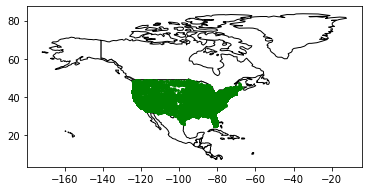

In [176]:
base = world[world.continent=='North America'].plot(color='white', edgecolor='black')
test_pd_to_gpd.plot(ax=base, marker='.', color='green', markersize=5);

In [54]:
states = gpd.read_file('../data/shp/cb_2018_us_state_500k.shp')

In [55]:
states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00257 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.64320 38.16909, -82.64300 38.169...

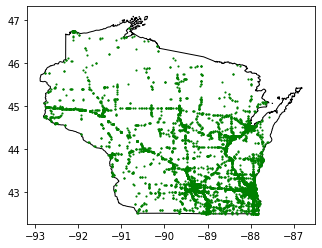

In [75]:
base = states[states.NAME=='Wisconsin'].plot(color='white', edgecolor='black')
test_pd_to_gpd[test_pd_to_gpd.State == 'WI'].plot(ax=base, marker='.', color='green', markersize=5);

In [89]:
wi = states[states.NAME=='Wisconsin'].copy()
wi_crs = wi.to_crs(epsg=3857)

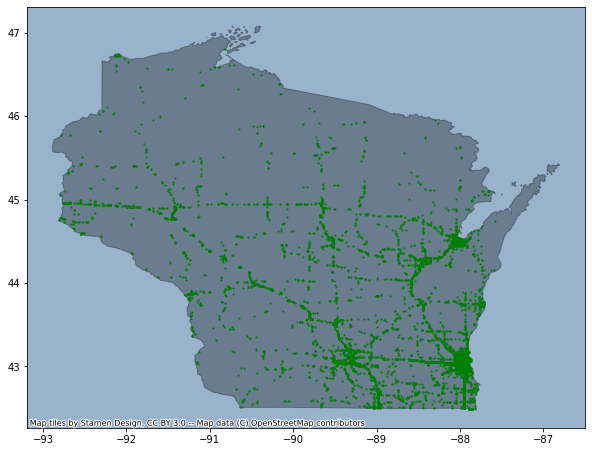

In [606]:
base = wi.plot(figsize=(10,10), color='black',alpha=0.3, edgecolor='black')
ctx.add_basemap(base, zoom = 18)
test_pd_to_gpd[test_pd_to_gpd.State == 'WI'].plot(ax=base, marker='.', color='green', markersize=5);
# df = df.to_crs(epsg=3857)



w: -92.8893149
s: 42.4919515
e: -86.249548
n: 47.3025
place: Wisconsin, United States
zoom: 8
n_tiles: 1


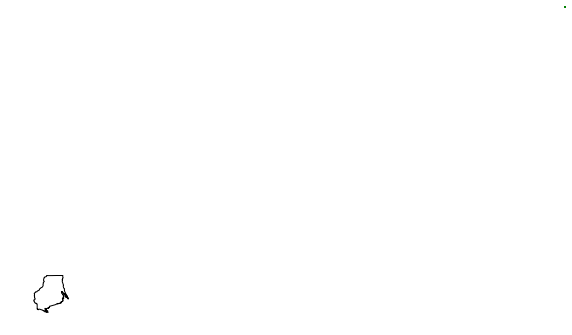

In [613]:
loc = ctx.Place("Wisconsin")  # zoom_adjust modifies the auto-zoom

# Print some metadata
for attr in ["w", "s", "e", "n", "place", "zoom", "n_tiles"]:
    print("{}: {}".format(attr, getattr(loc, attr)))

# Show the map
im1 = loc.im

fig, axs = plt.subplots(figsize=(10, 10))
wi_crs.plot(ax=axs, color= 'none', edgecolor='black')
ctx.plot_map(im1, ax=axs)
test_pd_to_gpd[test_pd_to_gpd.State == 'WI'].plot(ax=axs, marker='.', color='green', markersize=5);
plt.show(axs)

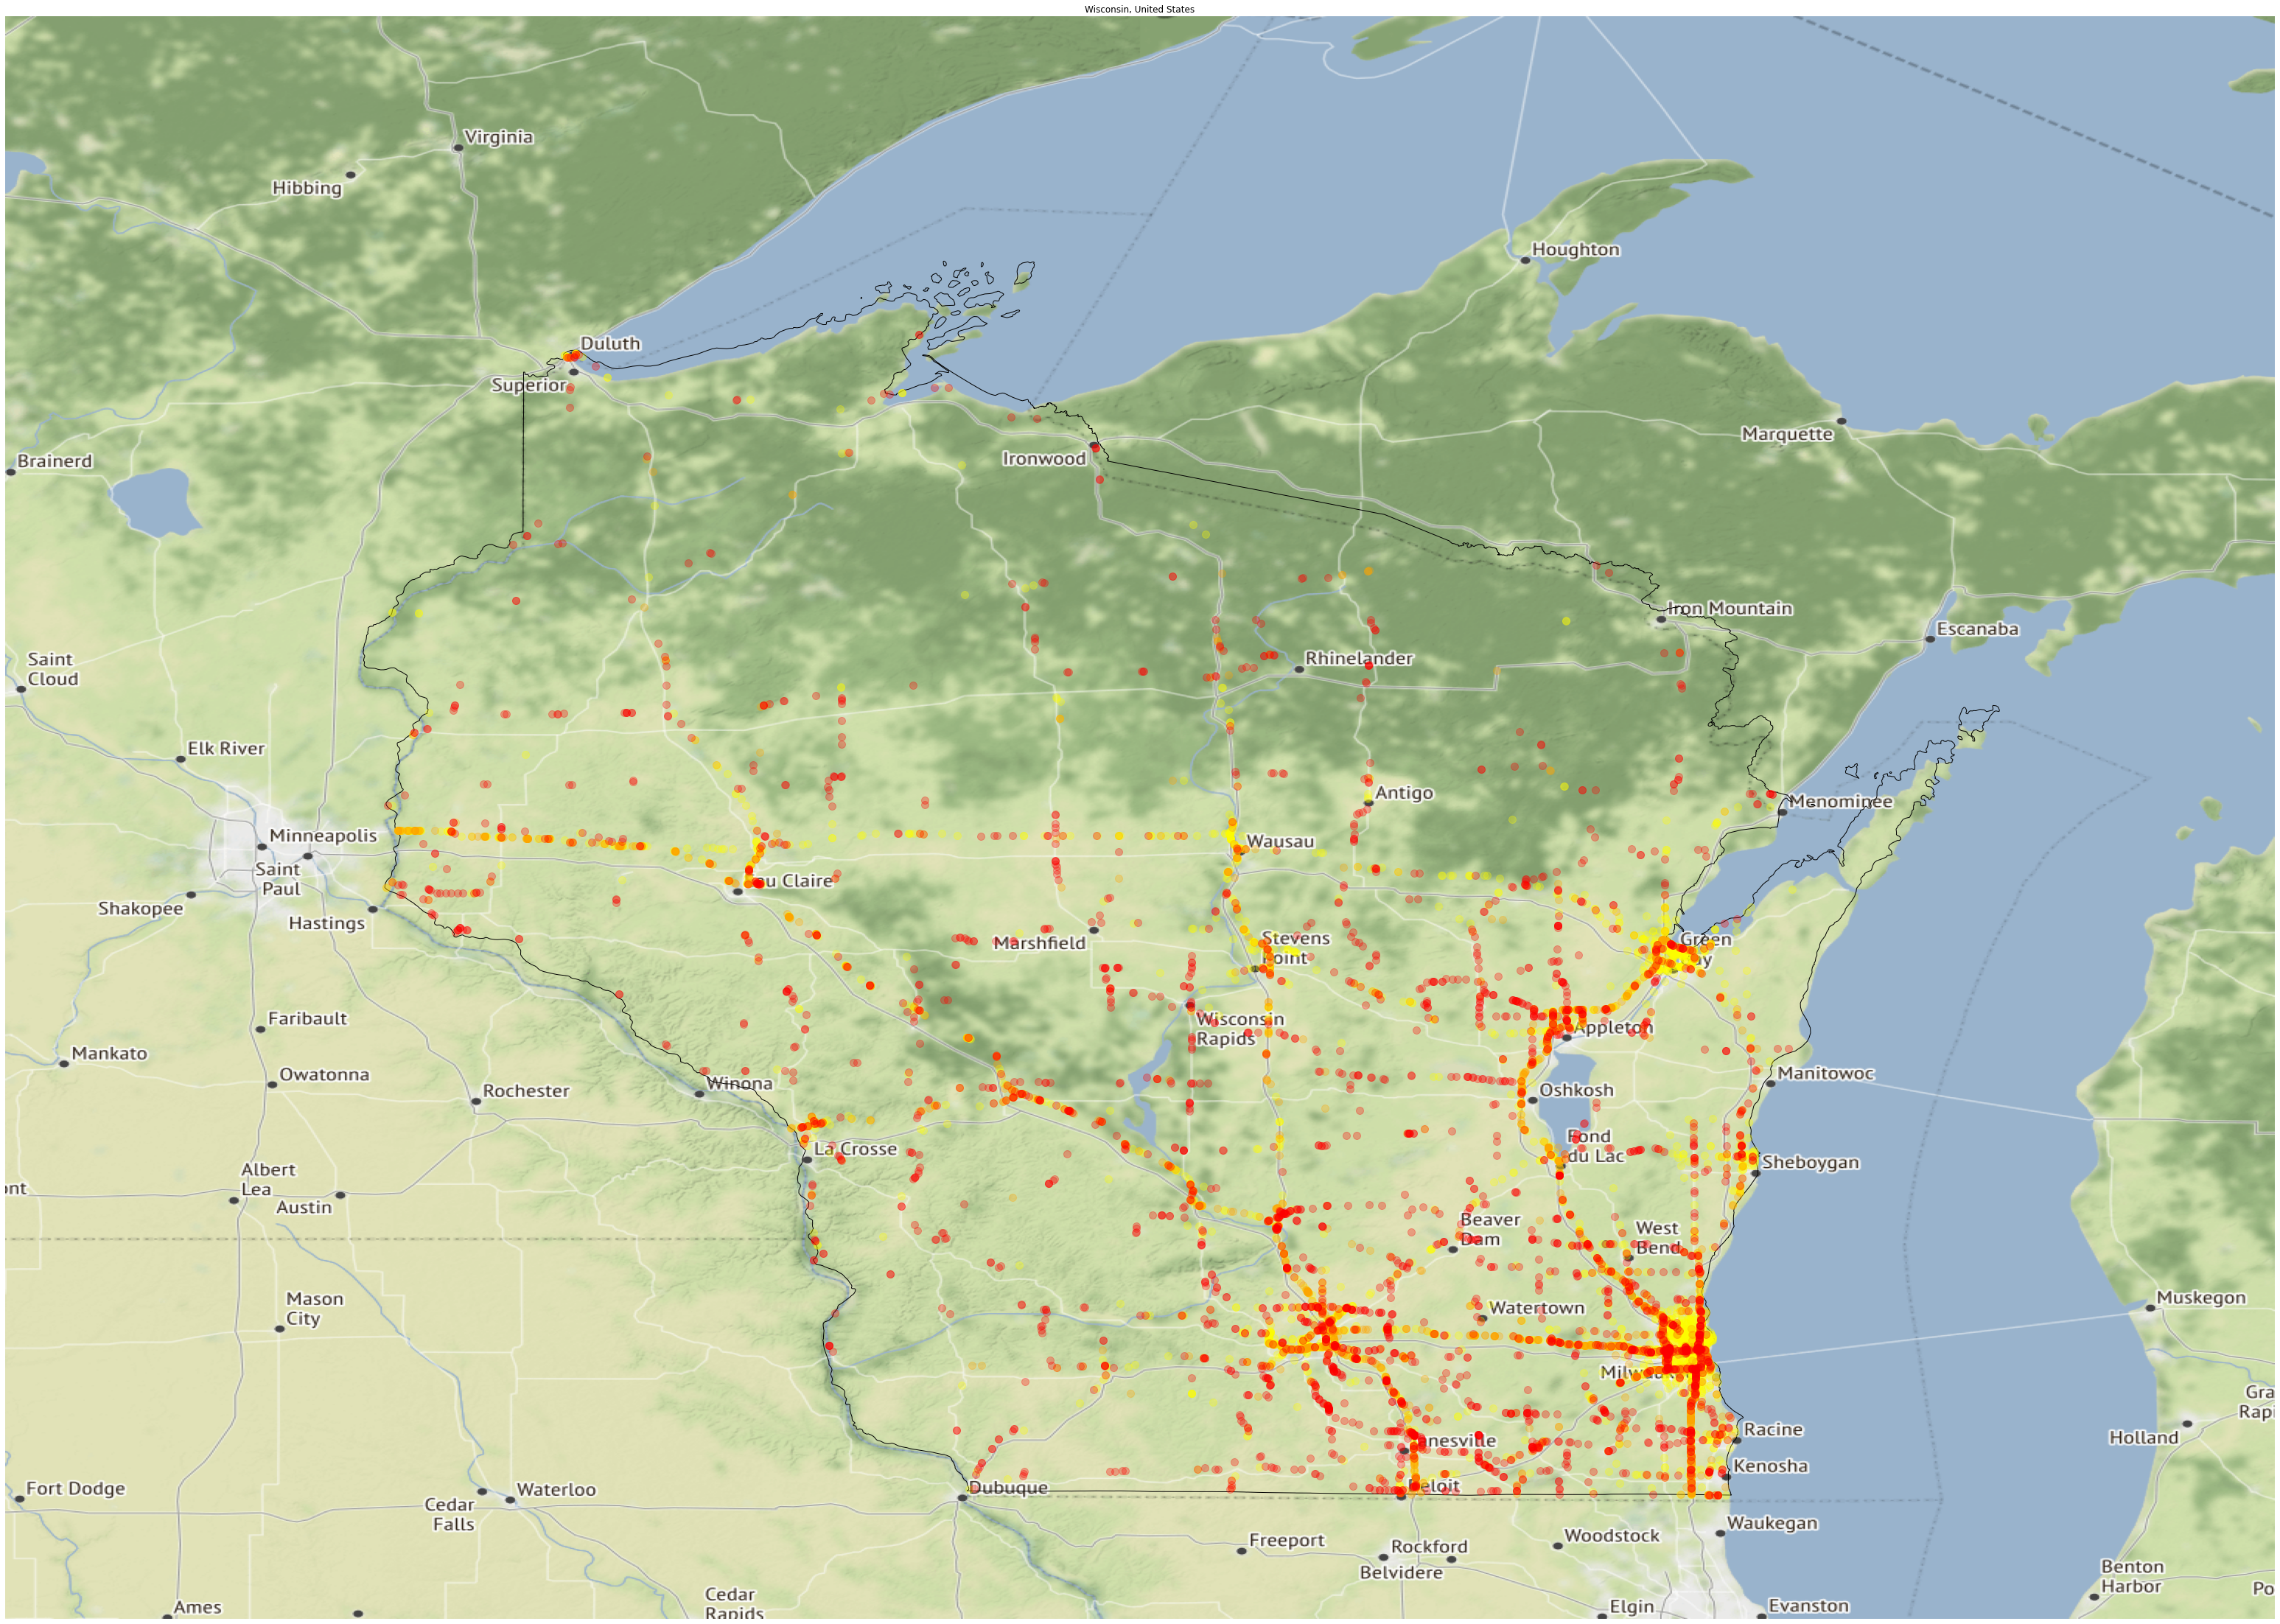

In [599]:
fig, ax = plt.subplots(figsize=(100, 40))
ctx.plot_map(loc, ax=ax)
wi.plot(ax=ax, color= 'none', edgecolor='black')
test_pd_to_gpd[(test_pd_to_gpd.State == 'WI')&(test_pd_to_gpd.Severity==1)].plot(ax=ax, marker='o', color='green', markersize=100,alpha=.3)
test_pd_to_gpd[(test_pd_to_gpd.State == 'WI')&(test_pd_to_gpd.Severity==2)].plot(ax=ax, marker='o', color='yellow', markersize=100,alpha=.3)
test_pd_to_gpd[(test_pd_to_gpd.State == 'WI')&(test_pd_to_gpd.Severity==3)].plot(ax=ax, marker='o', color='orange', markersize=100,alpha=.3)
test_pd_to_gpd[(test_pd_to_gpd.State == 'WI')&(test_pd_to_gpd.Severity==4)].plot(ax=ax, marker='o', color='red', markersize=100,alpha=.3)

plt.show(ax)

In [148]:
test_pd_to_gpd.groupby('Severity')[['Severity','Description'].head()

Severity                                        Description
0           2            Accident on Tanner Rd at Pennbrooke Ln.
1           2  Accident on Houston Branch Rd at Providence Br...
2           2  Stationary traffic on CA-17 from Summit Rd (CA...
3           2         Accident on US-395 Southbound at Topsy Ln.
4           3  Accident on I-595 Westbound at Exit 4 / Pine I...
5           3  Three lanes blocked due to accident on I-77 No...
6           4  Closed between CO-13/Taughenbaugh Blvd/Exit 90...
7           2                    At CA-60/Pomona Fwy - Accident.
14          3                 At I-287/W Oakland Ave - Accident.
20          3  Lane blocked due to accident on I-285 Eastboun...
25          3  Lane blocked due to accident on I-680 Northbou...
40          4  Incident on I-376 EB near I-376 Road closed. T...
56          1                          At Eastway Dr - Accident.
103         1                        At NE 162nd Ave - Accident.
146         4  Closed between PA-987/Airport Rd and Fullerton...
157         1  Between RT-24/Exit 7 and Bay St/Exit 9 - Accid...
167         4  Closed between Pinconning Rd/Exit 181 and Linw...
196         4  Ramp closed to CA-15 - Road closed due to acci...
339         1                            At Canal St - Accident.
577         1  At N Northgate Way - Accident. Left lane blocked.

In [155]:
test_pd_to_gpd[(test_pd_to_gpd.State == 'WI')&(test_pd_to_gpd.Severity==1)].count()

ID                       33
Severity                 33
Start_Time               33
End_Time                 33
Start_Lat                33
Start_Lng                33
End_Lat                  33
End_Lng                  33
Distance(mi)             33
Description              33
Number                   11
Street                   33
Side                     33
City                     33
County                   33
State                    33
Zipcode                  33
Country                  33
Timezone                 33
Airport_Code             33
Weather_Timestamp        33
Temperature(F)           33
Wind_Chill(F)            33
Humidity(%)              33
Pressure(in)             33
Visibility(mi)           33
Wind_Direction           33
Wind_Speed(mph)          33
Precipitation(in)        33
Weather_Condition        33
Amenity                  33
Bump                     33
Crossing                 33
Give_Way                 33
Junction                 33
No_Exit             

In [180]:
test_pd_to_gpd['Start_Time'].head()

0    2019-05-21 08:29:55
1    2019-10-07 17:43:09
2    2020-12-13 21:53:00
3    2018-04-17 16:51:23
4    2016-08-31 17:40:49
Name: Start_Time, dtype: object

In [181]:
test_pd_to_gpd['Start_Time'].iloc[0]

'2019-05-21 08:29:55'

In [182]:
type(test_pd_to_gpd['Start_Time'].iloc[0])

str

In [193]:
test = pd.to_datetime(test_pd_to_gpd['Start_Time'])

In [194]:
type(test)

pandas.core.series.Series

In [196]:
test_pd_to_gpd['Start_Time'] = pd.to_datetime(test_pd_to_gpd['Start_Time'])

In [312]:
test_pd_to_gpd.sort_values(by='Start_Time')

ID  Severity          Start_Time             End_Time  \
3654        A-3655         3 2016-02-08 00:37:08  2016-02-08 06:37:08   
799673    A-799674         2 2016-02-08 05:56:20  2016-02-08 11:56:20   
919741    A-919742         2 2016-02-08 06:07:59  2016-02-08 06:37:59   
205479    A-205480         2 2016-02-08 06:15:39  2016-02-08 12:15:39   
1324739  A-1324740         2 2016-02-08 06:15:39  2016-02-08 12:15:39   
...            ...       ...                 ...                  ...   
1857087  A-1857088         2 2020-12-31 22:50:29  2020-12-31 23:19:51   
2652990  A-2652991         2 2020-12-31 22:51:32  2020-12-31 23:51:32   
784782    A-784783         2 2020-12-31 22:51:32  2020-12-31 23:51:32   
244084    A-244085         3 2020-12-31 22:57:02  2020-12-31 23:58:36   
1915653  A-1915654         2 2020-12-31 23:28:56  2020-12-31 23:59:37   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
3654     40.108910  -83.092860  40.112060  -83.031870         3.230   
799673   39.865420  -84.062800  39.865010  -84.048730         0.747   
919741   39.928059  -82.831184        NaN         NaN         0.010   
205479   39.102660  -84.524680  39.102090  -84.523960         0.055   
1324739  39.101480  -84.523410  39.098410  -84.522410         0.219   
...            ...         ...        ...         ...           ...   
1857087  40.522301 -111.938889  40.522301 -111.938889         0.000   
2652990  44.093917 -123.104027  44.096457 -123.108917         0.299   
784782   44.093917 -123.104027  44.096457 -123.108917         0.299   
244084   41.932789  -88.038078  41.932789  -88.038078         0.000   
1915653  45.024064 -123.827623  45.049374 -123.785633         2.695   

                                               Description  ...  Station  \
3654     Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...    False   
799673                  At OH-4/OH-235/Exit 41 - Accident.  ...    False   
919741   Accident on Brice Rd at Tussing Rd. Expect del...  ...    False   
205479                    At I-71/US-50/Exit 1 - Accident.  ...    False   
1324739                   At I-71/US-50/Exit 1 - Accident.  ...    False   
...                                                    ...  ...      ...   
1857087  Lane blocked due to accident on UT-68 Redwood ...  ...    False   
2652990  A crash has occurred causing no to minimum del...  ...    False   
784782   A crash has occurred causing no to minimum del...  ...    False   
244084   Lane blocked due to accident on I-355 Southbou...  ...    False   
1915653  Stationary traffic on OR-18 from N Bear Creek ...  ...    False   

          Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
3654     False           False          False        False          Night   
799673   False           False          False        False          Night   
919741   False           False          False        False          Night   
205479   False           False          False        False          Night   
1324739  False           False          False        False          Night   
...        ...             ...            ...          ...            ...   
1857087  False           False           True        False          Night   
2652990  False           False          False        False          Night   
784782   False           False          False        False          Night   
244084   False           False          False        False          Night   
1915653  False           False          False        False          Night   

        Civil_Twilight Nautical_Twilight Astronomical_Twilight  \
3654             Night             Night                 Night   
799673           Night             Night                 Night   
919741           Night             Night                   Day   
205479           Night             Night                   Day   
1324739          Night             Night                   Day   
...                ...               ...            

<AxesSubplot:>

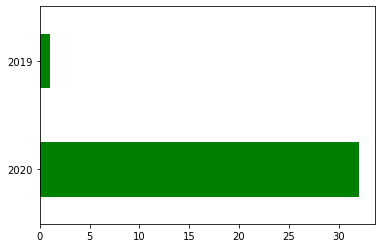

In [361]:
test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==1)]['Start_Time'].dt.year.sort_values().value_counts().plot.barh(color='green')

<AxesSubplot:>

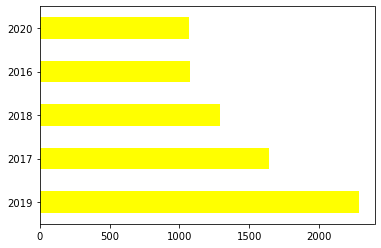

In [369]:
test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==2)]['Start_Time'].dt.year.value_counts().plot.barh(color='yellow')

<AxesSubplot:>

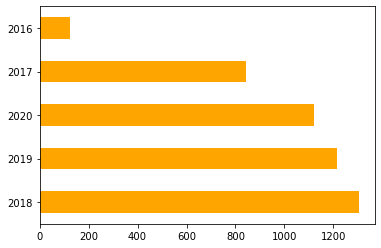

In [310]:
test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==3)]['Start_Time'].dt.year.value_counts().plot.barh(color='orange')

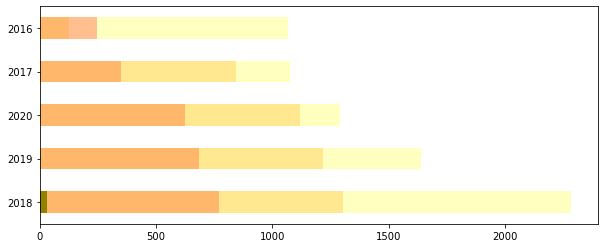

In [512]:
fig, axs = plt.subplots(figsize=(10,4))
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==1)]['Start_Time'].dt.year.sort_values().value_counts().plot.barh(color='green', alpha=1)
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==2)]['Start_Time'].dt.year.value_counts().plot.barh(color='yellow', alpha=.25)
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==4)]['Start_Time'].dt.year.value_counts().plot.barh(color='red', alpha=.25)
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==3)]['Start_Time'].dt.year.value_counts().plot.barh(color='orange',alpha=.25)
plt.show(fig)

In [279]:
test_pd_to_gpd[test_pd_to_gpd.State=='WI'].info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14669 entries, 154 to 2906596
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     14669 non-null  object        
 1   Severity               14669 non-null  int64         
 2   Start_Time             14669 non-null  datetime64[ns]
 3   End_Time               14669 non-null  object        
 4   Start_Lat              14669 non-null  float64       
 5   Start_Lng              14669 non-null  float64       
 6   End_Lat                13589 non-null  float64       
 7   End_Lng                13589 non-null  float64       
 8   Distance(mi)           14669 non-null  float64       
 9   Description            14669 non-null  object        
 10  Number                 2831 non-null   float64       
 11  Street                 14669 non-null  object        
 12  Side                   14669 non-null  object   

In [284]:
cites = test_pd_to_gpd[test_pd_to_gpd.State=='WI'].groupby('City')

In [299]:
cites['City'].count()>10

City
Abbotsford     False
Abrams         False
Adams          False
Adell          False
Albion         False
               ...  
Withee         False
Wittenberg     False
Woodruff       False
Woodville       True
Wrightstown    False
Name: City, Length: 456, dtype: bool

In [301]:
cites.head()

ID  Severity          Start_Time             End_Time  \
154          A-155         2 2020-11-04 06:24:33  2020-11-04 07:11:48   
556          A-557         2 2019-09-13 09:44:45  2019-09-13 10:56:35   
617          A-618         2 2017-08-02 07:43:04  2017-08-02 13:43:04   
652          A-653         2 2019-05-24 15:47:26  2019-05-24 16:15:21   
1008        A-1009         4 2019-02-04 08:18:21  2019-02-04 08:47:46   
...            ...       ...                 ...                  ...   
2887991  A-2887992         4 2018-07-11 16:48:48  2018-07-11 22:48:48   
2889680  A-2889681         4 2016-11-01 10:23:45  2016-11-01 16:23:45   
2893581  A-2893582         4 2019-03-31 17:48:11  2019-03-31 18:17:34   
2896070  A-2896071         2 2019-09-06 09:23:21  2019-09-06 10:24:07   
2906519  A-2906520         4 2018-03-31 14:01:09  2018-03-31 20:01:09   

         Start_Lat  Start_Lng    End_Lat    End_Lng  Distance(mi)  \
154      44.347912 -88.737572        NaN        NaN         1.930   
556      42.988430 -87.984047  42.988430 -87.984047         0.000   
617      43.027510 -88.012630  43.027496 -88.015779         0.159   
652      42.614790 -87.952270  42.614450 -87.951350         0.052   
1008     44.854678 -88.349982  44.844195 -88.359718         0.867   
...            ...        ...        ...        ...           ...   
2887991  42.786607 -89.628021  42.792425 -89.630527         0.422   
2889680  43.357568 -90.556519  43.340340 -90.525720         1.952   
2893581  43.783020 -88.251320  43.783367 -88.260297         0.448   
2896070  43.737839 -87.782417  43.737839 -87.782417         0.000   
2906519  45.505072 -92.528270  45.497919 -92.528360         0.494   

                                               Description  ...  Station  \
154      Lane blocked due to accident on US-45 Northbou...  ...    False   
556                   Accident on 56th St at Oklahoma Ave.  ...    False   
617                 At WI-181/84th St/Exit 306 - Accident.  ...    False   
652                               At I-94/I-41 - Accident.  ...    False   
1008     Closed at Lindquest Rd - Road closed due to ac...  ...    False   
...                                                    ...  ...      ...   
2887991      Closed at Cr-h - Road closed due to accident.  ...    False   
2889680     Closed at US-14 - Road closed due to accident.  ...    False   
2893581  Closed at CR-W/Hinn Rd - Road closed due to ac...  ...    False   
2896070               Accident on Grafton Ct at Church St.  ...    False   
2906519  Closed at CR-G/Main St W - Road closed due to ...  ...    False   

          Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
154      False           False          False        False          Night   
556      False           False          False        False            Day   
617      False           False          False        False            Day   
652      False           False          False        False            Day   
1008     False           False          False        False            Day   
...        ...             ...            ...          ...            ...   
2887991  False           False          False        False            Day   
2889680  False           False          False        False            Day   
2893581  False           False          False        False            Day   
2896070  False           False          False        False            Day   
2906519  False           False          False        False            Day   

        Civil_Twilight Nautical_Twilight Astronomical_Twilight  \
154                Day               Day                   Day   
556                Day               Day                   Day   
617                Day               Day                   Day   
652                Day               Day                   Day   
1008               Day               Day                   Day   
...                ...               ...                   ...   
2887991   

In [324]:
max_ = test_pd_to_gpd[test_pd_to_gpd.State=='WI']['Distance(mi)'].max()

In [325]:
test_pd_to_gpd[test_pd_to_gpd['Distance(mi)']==max_]

ID  Severity          Start_Time             End_Time  \
1687906  A-1687907         3 2017-07-30 16:03:01  2017-07-30 16:32:27   

         Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
1687906  44.579002 -91.205017      NaN      NaN         28.24   

                                               Description  ...  Station  \
1687906  Accident on I-94 Eastbound from Exit 70 US-53 ...  ...    False   

          Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
1687906  False           False          False        False            Day   

        Civil_Twilight Nautical_Twilight Astronomical_Twilight  \
1687906            Day               Day                   Day   

                           geometry  
1687906  POINT (-91.20502 44.57900)  

[1 rows x 48 columns]

<AxesSubplot:xlabel='Severity,Civil_Twilight'>

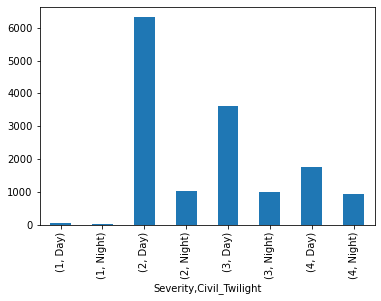

In [330]:
test_pd_to_gpd[test_pd_to_gpd.State=='WI'].groupby(test_pd_to_gpd.Severity)['Civil_Twilight'].value_counts().plot.bar()

<AxesSubplot:xlabel='Civil_Twilight,Severity'>

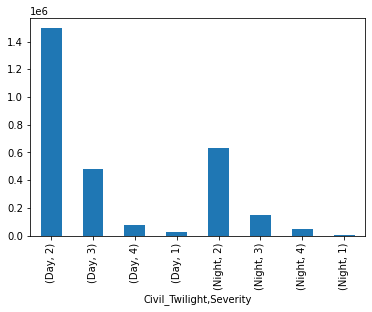

In [335]:
test_pd_to_gpd.groupby([test_pd_to_gpd.Civil_Twilight])['Severity'].value_counts().plot.bar()

In [400]:
wi_1=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==1)]['Start_Time'].dt.year.value_counts()
wi_2=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==2)]['Start_Time'].dt.year.value_counts()
wi_3=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==3)]['Start_Time'].dt.year.value_counts()
wi_4=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==4)]['Start_Time'].dt.year.value_counts()

In [378]:
wi_2.describe()

count       5.000000
mean     1470.200000
std       510.471057
min      1066.000000
25%      1074.000000
50%      1289.000000
75%      1639.000000
max      2283.000000
Name: Start_Time, dtype: float64

In [379]:
wi_1

2020    32
2019     1
Name: Start_Time, dtype: int64

In [380]:
wi_3

2018    1303
2019    1215
2020    1119
2017     845
2016     124
Name: Start_Time, dtype: int64

In [416]:
wi_4

2017    769
2018    686
2019    626
2016    351
2020    247
Name: Start_Time, dtype: int64

In [422]:
wi_4.values

array([769, 686, 626, 351, 247])

In [423]:
wi_4.index

Int64Index([2017, 2018, 2019, 2016, 2020], dtype='int64')

In [433]:
test_pd_to_gpd['year']=test_pd_to_gpd['Start_Time'].dt.year


In [457]:
test_pd_to_gpd.groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year]).count()

ID  Start_Time  End_Time  Start_Lat  Start_Lng  End_Lat  \
Severity year                                                                
1        2016     114         114       114        114        114       83   
         2017     125         125       125        125        125       92   
         2018     138         138       138        138        138      133   
         2019      99          99        99         99         99       91   
         2020   28275       28275     28275      28275      28275    28258   
2        2016  181845      181845    181845     181845     181845   146780   
         2017  291193      291193    291193     291193     291193   237359   
         2018  345488      345488    345488     345488     345488   331592   
         2019  453093      453093    453093     453093     453093   429710   
         2020  857644      857644    857644     857644     857644   833928   
3        2016   74653       74653     74653      74653      74653    49049   
         2017  132980      132980    132980     132980     132980    89003   
         2018  164806      164806    164806     164806     164806   142993   
         2019  138270      138270    138270     138270     138270   116993   
         2020  118743      118743    118743     118743     118743   102605   
4        2016   14269       14269     14269      14269      14269    14231   
         2017   23970       23970     23970      23970      23970    23814   
         2018   25489       25489     25489      25489      25489    25269   
         2019   26250       26250     26250      26250      26250    24622   
         2020   29166       29166     29166      29166      29166    27184   

               End_Lng  Distance(mi)  Description  Number  ...  Station  \
Severity year                                              ...            
1        2016       83           114          114      96  ...      114   
         2017       92           125          125      89  ...      125   
         2018      133           138          138      94  ...      138   
         2019       91            99           99      67  ...       99   
         2020    28258         28275        28275   12490  ...    28275   
2        2016   146780        181845       181845   65554  ...   181845   
         2017   237359        291193       291193  122952  ...   291193   
         2018   331592        345488       345488  159105  ...   345488   
         2019   429710        453093       453093  187785  ...   453093   
         2020   833928        857644       857644  355663  ...   857644   
3        2016    49049         74653        74653    5938  ...    74653   
         2017    89003        132980       132980    9487  ...   132980   
         2018   142993        164806       164806   11356  ...   164806   
         2019   116993        138270       138270   13767  ...   138270   
         2020   102605        118743       118743   17880  ...   118743   
4        2016    14231         14269        14269    6850  ...    14269   
         2017    23814         23970        23970   11422  ...    23970   
         2018    25269         25489        25489   11253  ...    25489   
         2019    24622         26250        26250   11308  ...    26250   
         2020    27184         29166        29166   11782  ...    29166   

                 Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
Severity year                                                          
1        2016     114              114             114           114   
         2017     125              125             125           125   
         2018     138              138             138           138   
         2019      99               99              99            99   
         2020   28275            28275           28275         28275   
2        2016  181845           181845          181845        181845   
         2017  291193           291193          291193        291193   
   

<AxesSubplot:xlabel='Severity,year'>

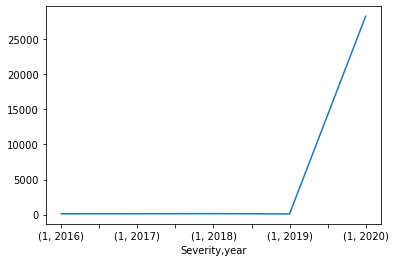

In [513]:
test_pd_to_gpd[test_pd_to_gpd.Severity==1].groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year]).count()['year'].plot()


<AxesSubplot:xlabel='Severity,year'>

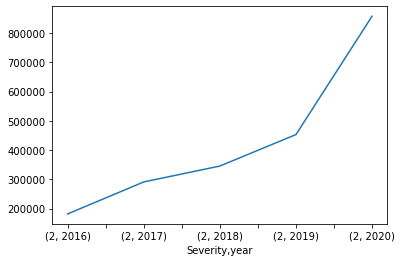

In [506]:
counts = test_pd_to_gpd[test_pd_to_gpd.Severity==2].groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year]).count()
counts['year'].plot()

<AxesSubplot:xlabel='Severity,year'>

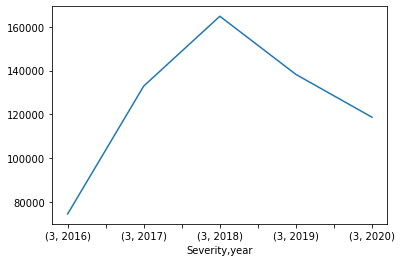

In [507]:
counts = test_pd_to_gpd[test_pd_to_gpd.Severity==3].groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year]).count()
counts['year'].plot()

<AxesSubplot:xlabel='Severity,year'>

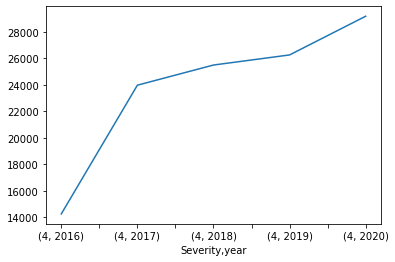

In [547]:
counts = test_pd_to_gpd[test_pd_to_gpd.Severity==4].groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year]).count()
counts['ID'].plot()

No handles with labels found to put in legend.


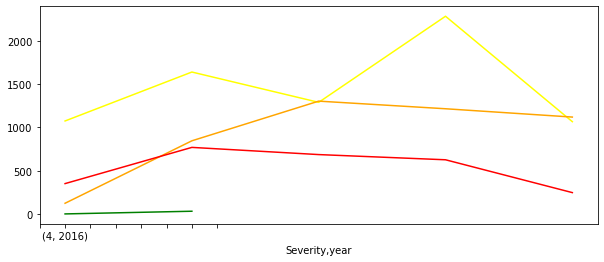

In [540]:
fig, axs = plt.subplots(figsize=(10,4))
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==1)].groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year]).count()['year'].plot(color='green',label='1')
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==2)].groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year]).count()['year'].plot(color='yellow',label='2')
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==3)].groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year]).count()['year'].plot(color='orange',label='3')
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==4)].groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year]).count()['year'].plot(color='red',label='4')
labels= ['2016','2017','2018','2019','2020']
ax.legend()
plt.show();

In [551]:
test_pd_to_gpd.groupby([test_pd_to_gpd.Severity,test_pd_to_gpd.year],as_index=False).count()

Severity  year      ID  Start_Time  End_Time  Start_Lat  Start_Lng  \
0          1  2016     114         114       114        114        114   
1          1  2017     125         125       125        125        125   
2          1  2018     138         138       138        138        138   
3          1  2019      99          99        99         99         99   
4          1  2020   28275       28275     28275      28275      28275   
5          2  2016  181845      181845    181845     181845     181845   
6          2  2017  291193      291193    291193     291193     291193   
7          2  2018  345488      345488    345488     345488     345488   
8          2  2019  453093      453093    453093     453093     453093   
9          2  2020  857644      857644    857644     857644     857644   
10         3  2016   74653       74653     74653      74653      74653   
11         3  2017  132980      132980    132980     132980     132980   
12         3  2018  164806      164806    164806     164806     164806   
13         3  2019  138270      138270    138270     138270     138270   
14         3  2020  118743      118743    118743     118743     118743   
15         4  2016   14269       14269     14269      14269      14269   
16         4  2017   23970       23970     23970      23970      23970   
17         4  2018   25489       25489     25489      25489      25489   
18         4  2019   26250       26250     26250      26250      26250   
19         4  2020   29166       29166     29166      29166      29166   

    End_Lat  End_Lng  Distance(mi)  ...  Station    Stop  Traffic_Calming  \
0        83       83           114  ...      114     114              114   
1        92       92           125  ...      125     125              125   
2       133      133           138  ...      138     138              138   
3        91       91            99  ...       99      99               99   
4     28258    28258         28275  ...    28275   28275            28275   
5    146780   146780        181845  ...   181845  181845           181845   
6    237359   237359        291193  ...   291193  291193           291193   
7    331592   331592        345488  ...   345488  345488           345488   
8    429710   429710        453093  ...   453093  453093           453093   
9    833928   833928        857644  ...   857644  857644           857644   
10    49049    49049         74653  ...    74653   74653            74653   
11    89003    89003        132980  ...   132980  132980           132980   
12   142993   142993        164806  ...   164806  164806           164806   
13   116993   116993        138270  ...   138270  138270           138270   
14   102605   102605        118743  ...   118743  118743           118743   
15    14231    14231         14269  ...    14269   14269            14269   
16    23814    23814         23970  ...    23970   23970            23970   
17    25269    25269         25489  ...    25489   25489            25489   
18    24622    24622         26250  ...    26250   26250            26250   
19    27184    27184         29166  ...    29166   29166            29166   

    Traffic_Signal  Turning_Loop  Sunrise_Sunset  Civil_Twilight  \
0              114           114             114             114   
1              125           125             125             125   
2              138           138             138             138   
3               99            99              99              99   
4            28275         28275           28272           28272   
5           181845        181845          181832          181832   
6           291193        291193          291179          291179   
7           345488        345488          345483          345483   
8           453093        453093          453087          453087   
9           857644        857644          857605          857605   
10           74653         74653           74652           74652   
11          132

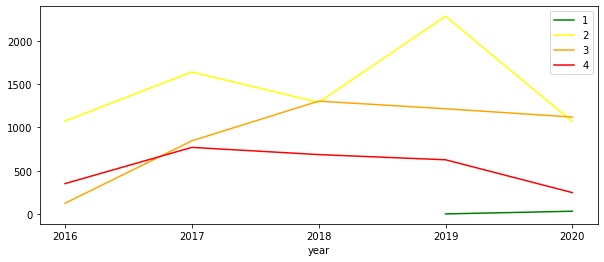

In [567]:
fig, axs = plt.subplots(figsize=(10,4))
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==1)].groupby([test_pd_to_gpd.year]).count()['year'].plot(color='green',label='1')
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==2)].groupby([test_pd_to_gpd.year]).count()['year'].plot(color='yellow',label='2')
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==3)].groupby([test_pd_to_gpd.year]).count()['year'].plot(color='orange',label='3')
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==4)].groupby([test_pd_to_gpd.year]).count()['year'].plot(color='red',label='4')
labels= ['2016','2017','2018','2019','2020']
x = np.linspace(2016,2020,5)
axs.set_xticks(x)
axs.set_xticklabels(labels)
plt.legend()
plt.show();

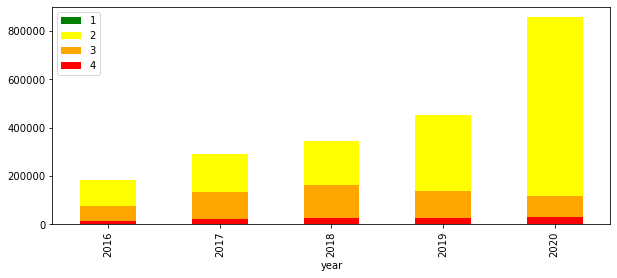

In [566]:
fig, axs = plt.subplots(figsize=(10,4))
axs=(test_pd_to_gpd[(test_pd_to_gpd.Severity==1)].groupby([test_pd_to_gpd.year]).count()['year'].plot.bar(color='green',label='1'))
axs=test_pd_to_gpd[(test_pd_to_gpd.Severity==2)].groupby([test_pd_to_gpd.year]).count()['year'].plot.bar(color='yellow',label='2')
axs=test_pd_to_gpd[(test_pd_to_gpd.Severity==3)].groupby([test_pd_to_gpd.year]).count()['year'].plot.bar(color='orange',label='3')
axs=test_pd_to_gpd[(test_pd_to_gpd.Severity==4)].groupby([test_pd_to_gpd.year]).count()['year'].plot.bar(color='red',label='4')
# labels= ['2016','2017','2018','2019','2020']
# x = np.linspace(2016,2020,5)
# axs.set_xticks(x)
# axs.set_xticklabels(labels)
plt.legend()
plt.show();

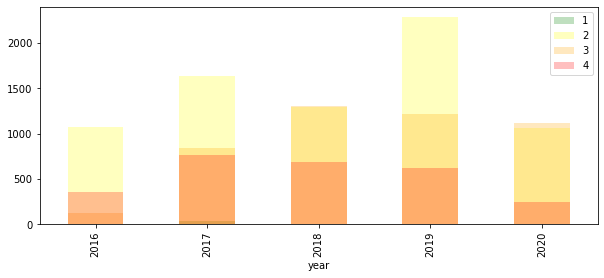

In [574]:
fig, axs = plt.subplots(figsize=(10,4))
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==1)].groupby([test_pd_to_gpd.year]).count()['year'].plot.bar(alpha=.25,color='green',label='1')
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==2)].groupby([test_pd_to_gpd.year]).count()['year'].plot.bar(alpha=.25,color='yellow',label='2')
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==3)].groupby([test_pd_to_gpd.year]).count()['year'].plot.bar(alpha=.25,color='orange',label='3')
axs=test_pd_to_gpd[(test_pd_to_gpd.State=='WI')&(test_pd_to_gpd.Severity==4)].groupby([test_pd_to_gpd.year]).count()['year'].plot.bar(alpha=.25,color='red',label='4')
labels= ['2016','2017','2018','2019','2020']

plt.legend()
plt.show();

<AxesSubplot:>

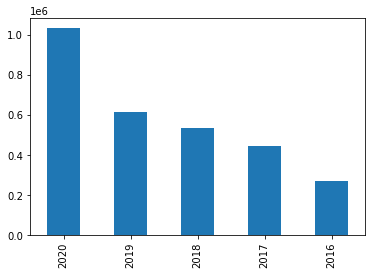

In [592]:
test_pd_to_gpd['year'].value_counts().plot.bar()